In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import torch
import torch.nn as nn
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("edm")
from bridge_matching.model.unet import UNet
from bridge_matching.dataset import FFHQDataset, ColoredMNIST

In [30]:
#dataset = FFHQDataset("datasets/ffhq/train")
dataset = ColoredMNIST(root="datasets/colored_mnist", train=True, download=True)

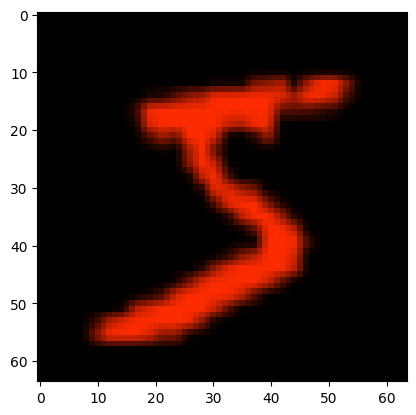

In [37]:
plt.imshow((dataset[0] * 0.5 + 0.5).permute(1, 2, 0).numpy())

In [11]:
model = UNet()
trainable_params = filter(lambda p: p.requires_grad, model.parameters())
num_params = sum([np.prod(p.size()) for p in trainable_params])
print(num_params)

61804419


In [ ]:
x = torch.randn(8, 3, 64, 64)
t = torch.rand(8)
y = model(x, t)
print(y.shape)

torch.Size([8, 3, 64, 64])
